In [2]:
import numpy as np
import astropy.units as u
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.io import fits
import matplotlib as mpl
import matplotlib.pyplot as plt

from deproject import deproject, get_galaxy_specs

In [3]:
galaxy = 'NGC1365'
RA, DEC, POSANG, INCL, DIST = get_galaxy_specs(galaxy) # DIST [Mpc]

In [6]:
hdu_galx = fits.open('/home/jackson/galaxies/NGC4548/ngc4548_w1_atGauss15.fits')[0]

wcs_galx = WCS(hdu_galx.header)
wcs_galx.sip = None

deproj_img = deproject(center_coord=(RA*u.deg, DEC*u.deg), incl=INCL*u.deg, pa=POSANG*u.deg,
                           header=hdu_galx.header, wcs=None, naxis=None, ra=None, dec=None,
                           return_offset=False)
r_deg = deproj_img[0]
r_pc = r_deg * (np.pi / 180) * (DIST * 1e6) # in pc
# data = hdu_galx.data.flatten() * np.cos(INCL*np.pi/180)
# radii = r_pc.flatten()

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


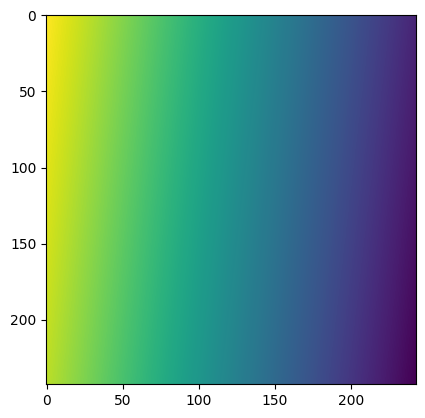

In [7]:
plt.imshow(r_pc)

## Incorporate the code provided to do the following:
### 1. Remake the figure above (radial distance in pc) using the WCS from the galaxy file header, similar and add axis labels and a color bar for radial distance (refer to `Fits_Image_Imshow.ipynb` for making images)
### 2. Make a mask (using logic statements and array slicing) in radius: Only display parts of the image where $R>5 kpc$.
### 3. Make a mask in intensity: Only display parts of the image where $I<1 MJy/sr$.

In [8]:
# r_pc = r_deg * (np.pi / 180) * (DIST * 1e6) # in
mask = (r_pc > 5*1e3) 
mask &= (r_pc < 50*1e3)
masked = r_pc.copy()
masked[~mask] = np.nan
realmask = masked.to_mask(mode='exact')
plt.imshow(masked)

AttributeError: 'numpy.ndarray' object has no attribute 'to_mask'

In [23]:
A = np.asarray([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])
A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [24]:
# 1:
A[0, 0]

1

In [27]:
# 1st row:
A[0, :]

array([1, 2, 3, 4])

In [28]:
# 1st column:
A[:, 0]

array([ 1,  5,  9, 13])

In [29]:
# 16:
A[-1, -1]

16

In [30]:
# last row
A[-1, :]

array([13, 14, 15, 16])

In [31]:
# 2nd to last column 
A[:, -2]

array([ 3,  7, 11, 15])

In [32]:
# above 10
A[A>10]

array([11, 12, 13, 14, 15, 16])

In [33]:
# 10 and above
A[A>=10]

array([10, 11, 12, 13, 14, 15, 16])

In [36]:
# less than 5 and above 10
A[(A<5) | (A>10)]

array([ 1,  2,  3,  4, 11, 12, 13, 14, 15, 16])

In [38]:
A.transpose()

array([[ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15],
       [ 4,  8, 12, 16]])

In [39]:
B = np.asarray([[np.nan, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, np.nan]])
B

array([[nan,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.],
       [13., 14., 15., nan]])

In [40]:
# finite values only
B[np.isfinite(B)]

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15.])

In [41]:
B[~np.isnan(B)]

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15.])